# Impact d'un AMOC affaibli sur le climat africain durant le Dryas Récent


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importation des données et bibliothèques
Nous commençons par importer les bibliothèques nécessaires et charger les jeux de données sur les précipitations et le flux de sable.

In [8]:
df = pd.read_csv("data/data.txt", sep="\t", engine="python", skip_blank_lines=True, comment="#")

print(df.head())

   depth_cm  age_BP  dDwax  dDwax_iv  d13Cwax   dDP  dDP_1s_lower  \
0       0.5    1959 -136.9    -136.7   -24.39 -17.2         -20.7   
1       3.5    2172 -135.6    -135.5   -24.37 -15.9         -19.2   
2       5.5    2357 -136.6    -136.6   -24.17 -16.8         -20.3   
3       7.5    2723 -137.7    -137.8   -24.21 -18.2         -21.4   
4       9.5    3104 -137.7    -137.9   -24.15 -18.1         -21.6   

   dDP_1s_upper  precip  precip_1s_lower  precip_1s_upper  
0         -13.7     126               67              213  
1         -12.5     103               51              186  
2         -13.3     115               67              196  
3         -14.6     151               84              249  
4         -14.9     153               84              258  


In [9]:
dataset = "https://www.ncei.noaa.gov/pub/data/paleo/contributions_by_author/tierney2017/tierney2017gc68.txt"

In [10]:
df.columns = df.columns.str.strip()
print(df.columns) 


Index(['depth_cm', 'age_BP', 'dDwax', 'dDwax_iv', 'd13Cwax', 'dDP',
       'dDP_1s_lower', 'dDP_1s_upper', 'precip', 'precip_1s_lower',
       'precip_1s_upper'],
      dtype='object')


## Prétraitement des données et visualisation de precipitation
Nous nettoyons les noms de colonnes, convertissons les types de données et les normalisons et préparons les colonnes pour l'analyse temporelle.

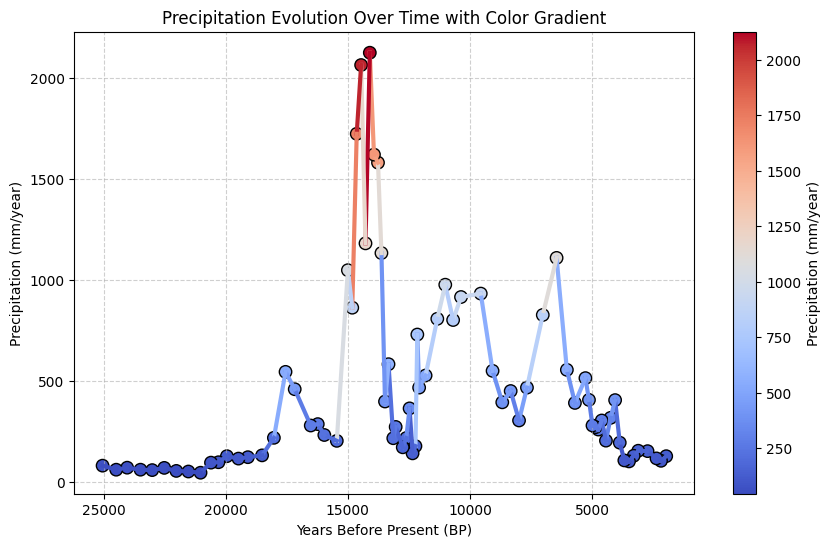

In [11]:
# Normalisation des données
norm = plt.Normalize(df["precip"].min(), df["precip"].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(df) - 1):
    ax.plot(df["age_BP"].iloc[i:i+2], df["precip"].iloc[i:i+2], color=sm.to_rgba(df["precip"].iloc[i]), linewidth=3)

scatter = ax.scatter(df["age_BP"], df["precip"], c=df["precip"], cmap="coolwarm", edgecolors="black", s=80)

ax.invert_xaxis()

ax.set_xlabel("Years Before Present (BP)")
ax.set_ylabel("Precipitation (mm/year)")
ax.set_title("Precipitation Evolution Over Time with Color Gradient")

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Precipitation (mm/year)")

ax.grid(True, linestyle="--", alpha=0.6)

plt.show()

## Visualisation des precipitations et dDwax : hydrogen isotopic composition of higher plant leaf waxes

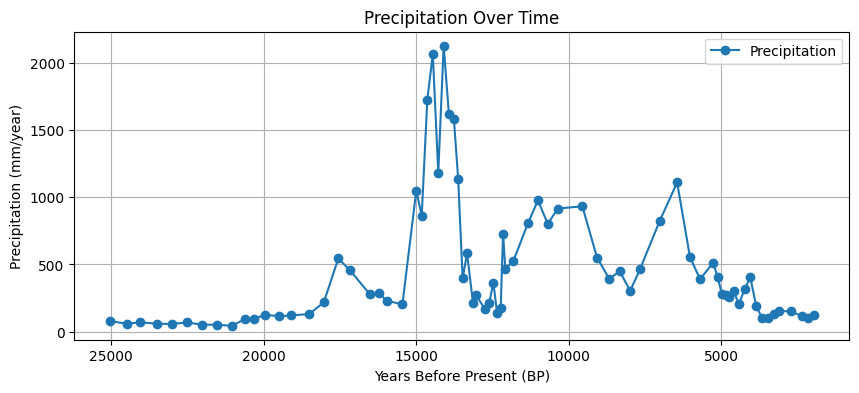

In [12]:
import matplotlib.pyplot as plt

# Convertissons age_BP a int (si pas déjà fait)
df["age_BP"] = df["age_BP"].astype(int)

# Creation premier plot (Precipitation)
plt.figure(figsize=(10, 4))
plt.plot(df["age_BP"], df["precip"], marker="o", color="tab:blue", label="Precipitation")
plt.xlabel("Years Before Present (BP)")
plt.ylabel("Precipitation (mm/year)")
plt.gca().invert_xaxis()  # Present a droite
plt.grid(True)
plt.legend()
plt.title("Precipitation Over Time")
plt.savefig("data/precipitation_over_years.png", dpi=300, bbox_inches="tight")
plt.show()


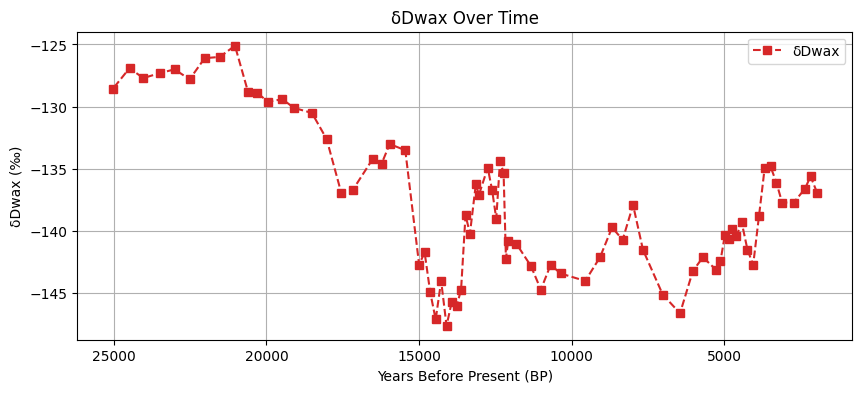

In [13]:
# Creation second plot (δDwax)
plt.figure(figsize=(10, 4))
plt.plot(df["age_BP"], df["dDwax"], marker="s", linestyle="dashed", color="tab:red", label="δDwax")
plt.xlabel("Years Before Present (BP)")
plt.ylabel("δDwax (‰)")
plt.gca().invert_xaxis() 
plt.grid(True)
plt.legend()
plt.title("δDwax Over Time")
plt.show()


##  Importation des données sur le flux de sable et pretraitement
Nous analysons un second jeu de données basé sur l'étude de *Ehrmann (2016)* qui donne une idée du flux de sable, indicateur de sécheresse régionale.


In [14]:
sand_flux_df = pd.read_csv('data/Ehrmann_2016.tab', sep='\t', comment='#')

print(sand_flux_df.head())


   Depth sed [m]  Age [ka BP]  Kln/Chl  Plg [%]  Kln [%]  Kln/std
0         0.0025        0.021     1.80      8.8     24.2      NaN
1         0.0075        0.063     1.80      7.7     24.7      NaN
2         0.0125        0.105     1.84      7.7     24.3      NaN
3         0.0175        0.147     2.00      9.9     26.0      NaN
4         0.0225        0.189     2.03     10.9     25.1      NaN


In [15]:
sand_flux_df["Age [ka BP]"]

0        0.021
1        0.063
2        0.105
3        0.147
4        0.189
        ...   
838    179.454
839    179.975
840    180.495
841    181.015
842    181.535
Name: Age [ka BP], Length: 843, dtype: float64

In [16]:
sand_flux_df["Age [ka BP]"] = sand_flux_df["Age [ka BP]"] * 1000

In [17]:
sand_flux_df = sand_flux_df[(sand_flux_df["Age [ka BP]"] < 25500) & (sand_flux_df["Age [ka BP]"] > 1500)]

In [18]:
sand_flux_df["Age [ka BP]"]

8      1552.0
9      1935.0
10     2225.0
11     2515.0
12     2805.0
       ...   
95    24335.0
96    24576.0
97    24817.0
98    25058.0
99    25299.0
Name: Age [ka BP], Length: 92, dtype: float64

In [19]:
df["age_BP"]

0      1959
1      2172
2      2357
3      2723
4      3104
      ...  
70    23011
71    23491
72    24037
73    24486
74    25044
Name: age_BP, Length: 75, dtype: int64

In [20]:
precip_years = df['age_BP'].values
sand_flux_years = sand_flux_df['Age [ka BP]'].values
sand_flux_values = sand_flux_df['Kln/Chl'].values 

sand_flux_interpolated = np.interp(precip_years, sand_flux_years, sand_flux_values)


## Visualisation de precipitation et de la concentration de sable

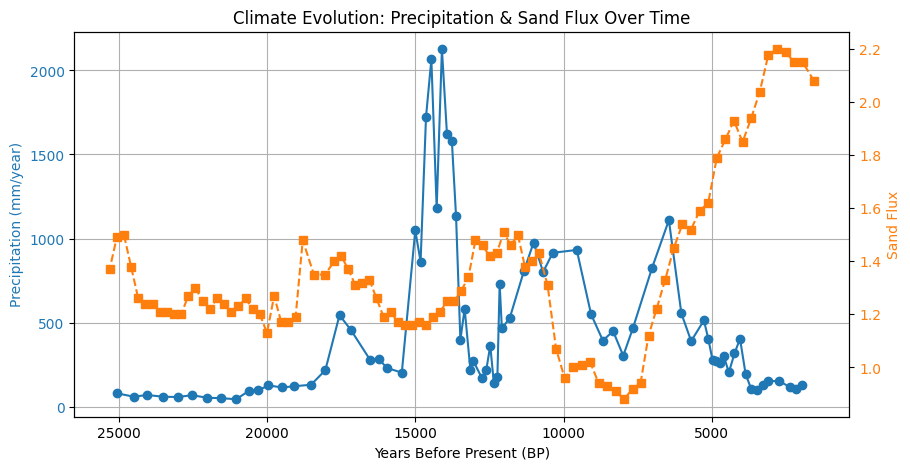

In [21]:
df["age_BP"] = df["age_BP"].astype(int)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Premier axe ordonné (Precipitation)
color = 'tab:blue'
ax1.set_xlabel("Years Before Present (BP)")
ax1.set_ylabel("Precipitation (mm/year)", color=color)
ax1.plot(df["age_BP"], df["precip"], marker="o", color=color, label="Precipitation")
ax1.tick_params(axis='y', labelcolor=color)

# Second axe ordonné (Sand Flux)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Sand Flux", color=color)
ax2.plot(sand_flux_df["Age [ka BP]"], sand_flux_df["Kln/Chl"], marker="s", linestyle="dashed", color=color, label="Sand Flux")
ax2.tick_params(axis='y', labelcolor=color)

ax1.invert_xaxis()

plt.title("Climate Evolution: Precipitation & Sand Flux Over Time")
ax1.grid(True)
plt.savefig("data/precipitation_sand_flux_over_years.png", dpi=300, bbox_inches="tight")

plt.show()


## Importation des données sur le lac Bosumtwi et lac Challa 


In [22]:
bosumtwi_df = pd.read_csv('data/lake_bosumtwi.tab', sep='\t', comment='#')

print(bosumtwi_df.head())
bosumtwi_df["age_calBP"] = bosumtwi_df["age_calBP"]
bosumtwi_df = bosumtwi_df[(bosumtwi_df["age_calBP"] < 20000)]

   age_calBP  d13CleafwaxC31  d2HleafwaxC31ivc
0    68.8162          -28.40        -19.463969
1   217.1656          -30.12        -19.605047
2   360.0397          -31.00        -12.654186
3   404.7102          -28.90        -15.056285
4   488.1144          -29.94        -13.752030


In [23]:
challa_df = pd.read_excel('data/challa.xlsx', sheet_name='Sheet2')

print(challa_df.head())
challa_df["Year BP"].unique
challa_df["Year BP"] = challa_df["Year BP"][challa_df["Year BP"] < 20000]

   Depth (cm)  Year BP      C28_dD    C28_dDIV
0           2      -30 -108.848485 -108.848485
1           6        8 -103.733939 -103.733939
2          10       46 -103.537091 -103.537091
3          14       83 -101.203030 -101.203030
4          18      120 -106.053939 -106.053939


## Visualization de differents isotopes dans les deux lacs au cours du temps

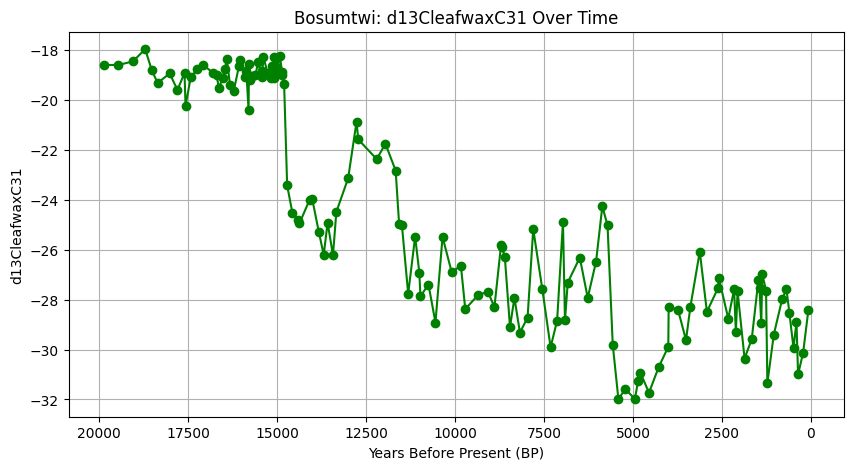

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(bosumtwi_df["age_calBP"], bosumtwi_df["d13CleafwaxC31"], marker="o", linestyle="-", color="green")
plt.gca().invert_xaxis() 
plt.xlabel("Years Before Present (BP)")
plt.ylabel("d13CleafwaxC31")
plt.title("Bosumtwi: d13CleafwaxC31 Over Time")
plt.grid(True)
plt.show()

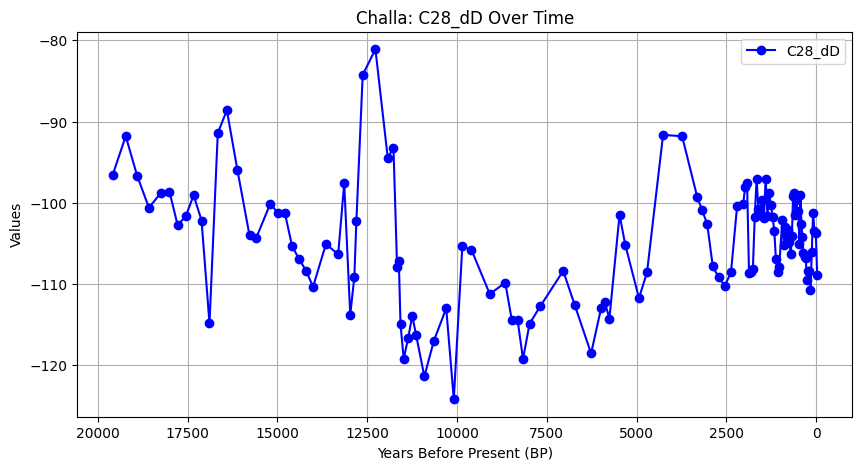

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(challa_df["Year BP"], challa_df["C28_dD"], marker="o", linestyle="-", color="blue", label="C28_dD")
plt.gca().invert_xaxis() 
plt.xlabel("Years Before Present (BP)")
plt.ylabel("Values")
plt.title("Challa: C28_dD Over Time")
plt.legend()
plt.grid(True)
plt.show()

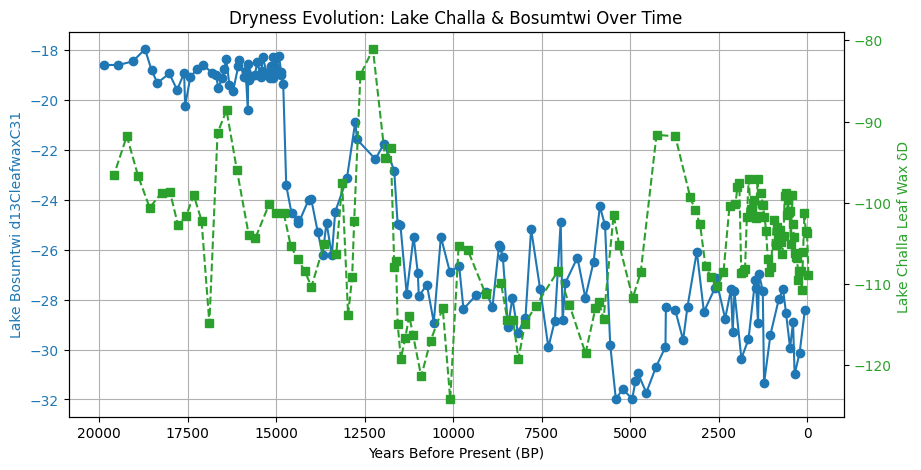

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Premier axe ordonné (Bosumtwi)
color = 'tab:blue'
ax1.set_xlabel("Years Before Present (BP)")
ax1.set_ylabel("Lake Bosumtwi d13CleafwaxC31", color=color)
ax1.plot(bosumtwi_df["age_calBP"], bosumtwi_df["d13CleafwaxC31"], marker="o", color=color, label="Leafwax d13C Bosumtwi")
ax1.tick_params(axis='y', labelcolor=color)

# Second axe ordonné (Challa)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel("Lake Challa Leaf Wax δD ", color=color)
ax2.plot(challa_df["Year BP"], challa_df["C28_dD"], marker="s", linestyle="dashed", color=color, label="Sand Flux")
ax2.tick_params(axis='y', labelcolor=color)

ax1.invert_xaxis()

plt.title("Dryness Evolution: Lake Challa & Bosumtwi Over Time")
ax1.grid(True)
plt.savefig("data/challa_bosumtwi_over_years.png", dpi=300, bbox_inches="tight")


plt.show()
